TASK 1: Leaf Disease Detection 

Objective: 
Detect and classify diseases in plant leaves using image data. 
Key Components: 
● Image Processing to clean and preprocess leaf images 
● Deep Learning (CNN) to classify leaves as healthy or infected 
● Dataset: Public datasets like PlantVillage or custom image collections  
● Frameworks: Use TensorFlow, Keras or PyTorch 


Import Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report


Set Paths

In [2]:
train_dir = "dataset_split/train"
val_dir = "dataset_split/val"
IMG_SIZE = (224, 224)
BATCH_SIZE = 16

Data Preprocessing & Augmentation

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_ds = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_ds = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 3599 images belonging to 3 classes.
Found 901 images belonging to 3 classes.


Build Model (Transfer Learning – MobileNetV2)

In [4]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # freeze base model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(3, activation='softmax')  # 3 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 8s 1us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Train the Model

In [5]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

c:\Users\atifb\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 363s 2s/step - accuracy: 0.7590 - loss: 0.5770 - val_accuracy: 0.9145 - val_loss: 0.2161
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 221s 982ms/step - accuracy: 0.9013 - loss: 0.2478 - val_accuracy: 0.9301 - val_loss: 0.1648
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 201s 892ms/step - accuracy: 0.9017 - loss: 0.2283 - val_accuracy: 0.9323 - val_loss: 0.1410
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 179s 795ms/step - accuracy: 0.9220 - loss: 0.1944 - val_accuracy: 0.9367 - val_loss: 0.1459
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 185s 823ms/step - accuracy: 0.9218 - loss: 0.1977 - val_accuracy: 0.9312 - val_loss: 0.1657
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 183s 813ms/step - accuracy: 0.9284 - loss: 0.1784 - val_accuracy: 0.9378 - val_loss: 0.1462
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 176s 784ms/step - accuracy: 0.9340 - loss: 0.1724 - val_accuracy: 0.9478 - val_loss: 0.1409
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 179s 795ms/step - accuracy: 0.9395 - lo

Plot Training Results

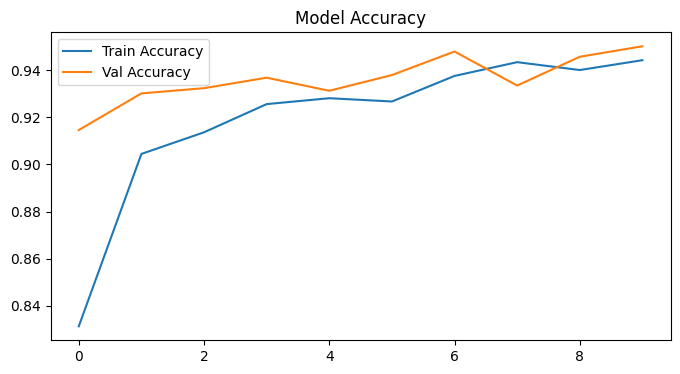

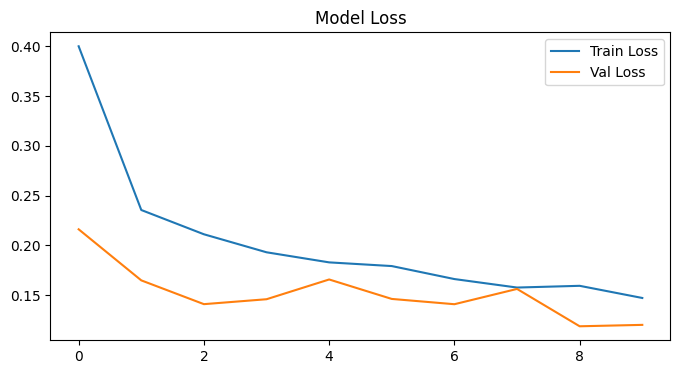

In [6]:
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

Evaluate on Validation Data

57/57 ━━━━━━━━━━━━━━━━━━━━ 33s 548ms/step
Classification Report:

                     precision    recall  f1-score   support

Tomato_Early_blight       0.86      0.95      0.90       200
 Tomato_Late_blight       0.96      0.93      0.95       382
     Tomato_healthy       1.00      0.97      0.98       319

           accuracy                           0.95       901
          macro avg       0.94      0.95      0.94       901
       weighted avg       0.95      0.95      0.95       901



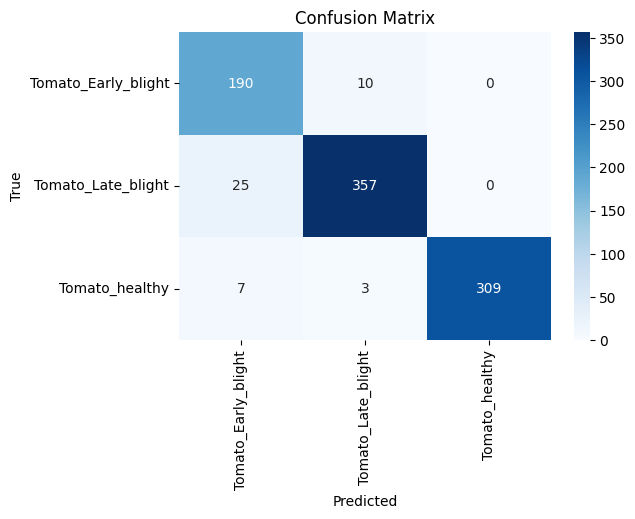

In [7]:
val_preds = model.predict(val_ds)
y_pred = np.argmax(val_preds, axis=1)
y_true = val_ds.classes
class_labels = list(val_ds.class_indices.keys())

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Save Model

In [8]:
model.save("leaf_disease_model.h5")
print("Model saved as leaf_disease_model.h5 ✅")


Model saved as leaf_disease_model.h5 ✅


Test with Your Own Image

In [14]:
import cv2

def predict_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, IMG_SIZE)
    img_array = np.expand_dims(img / 255.0, axis=0)
    pred = model.predict(img_array)
    idx = np.argmax(pred)
    return class_labels[idx], float(np.max(pred))

label, confidence = predict_image("test_leaf2.jpeg")
print(f"Prediction: {label} ({confidence*100:.2f}% confidence)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Prediction: Tomato_Late_blight (98.74% confidence)
